# Lead Scoring Case Study

### Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

So, we will try to build a Logistic Regression model which will assign a lead score between 0 to 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. 

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings.
import warnings
warnings.filterwarnings("ignore")

### READING DATA

In [3]:
# Importing dataset
leads = pd.read_csv('leads.csv')

# Making a copy of the dataset if needed
leads_original = leads.copy()

In [4]:
# Exploring the top 5 rows of the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### DATA UNDERSTANDING

In [5]:
# Exploring shape of the dataset
leads.shape

(9240, 37)

In [6]:
# Exploring columns of the dataset for data type
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Exploring Descriptive Statistics of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### DATA CLEANING

In [8]:
# Checking the unique values in all features
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

##### Inference:
From the above values we can find that
- The features 'Prospect ID' & 'Lead Number' are index columns and as all the values are different. So, they will not help in model building. We can drop both the columns.
- The features 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have only one value for all the records. So, it doesn't have any variance and will not impact in model building. So, we can drop all these columns. 

In [9]:
# Dropping the columns 'Prospect ID' & 'Lead Number'
leads.drop(['Prospect ID',
            'Lead Number'], 
           axis=1, inplace=True)

In [10]:
# Dropping all the columns having only 1 unique value 
leads.drop(['Magazine', 
            'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 
            'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], 
           axis=1, inplace=True)

There are a few variables which are created after contacting the Student(Customer) by the Sales team. So, we don't need these variables as we are building the model on the Source data and not on the data provided by Sales team after the student have  already been contacted. Below are these variables -
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Tags
- Lead Quality
- Lead Profile

In [11]:
# Dropping the above columns
leads.drop(['Asymmetrique Activity Index', 
            'Asymmetrique Profile Index', 
            'Asymmetrique Activity Score', 
            'Asymmetrique Profile Score', 
            'Tags', 
            'Lead Quality', 
            'Lead Profile'], 
           axis=1, inplace=True)

In [12]:
# Checking the shape of the dataset after dropping 14 variables
leads.shape

(9240, 23)

There are 'Select' values in the dataframe, which means no option has been chosen for those fields. So, these are basically missings values in the dataset and will replace them with NAN. 

In [13]:
# Replacing 'Select' values with null values
leads.replace('Select', np.nan, inplace=True)

In [14]:
# Checking the percentage of null values in all the features
round((leads.isnull().sum()/len(leads))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

##### Inference:
We could find the following from the above missing values -
- We will drop the features having greater than 45% missing values.
- For other features we will analyze the unique values and will drop the columns if it has skewed data.
- For features with less percentage of missing values, we will impute or drop the records as required.

In [15]:
# Dropping all the columns where more than 45% of values are missing from the dataset 
leads.dropna(axis=1,thresh=leads.shape[0]*0.55,inplace=True)

In [16]:
# Determining the shape of the dataset after dropping columns with more than 45% missing values from the dataset
leads.shape

(9240, 22)

##### Inference:
Feature 'How did you hear about X Education' has been dropped due to more than 45% missing values in the column.

#### Analyzing the column 'Country'

In [17]:
# Checking the percentage of each category in the 'Country' column
(leads.Country.value_counts(dropna=False)/len(leads.Country))*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Kuwait                   0.043290
Canada                   0.043290
Nigeria                  0.043290
South Africa             0.043290
Germany                  0.043290
Sweden                   0.032468
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
China                    0.021645
Philippines              0.021645
Switzerland   

##### Inference:
From the above values, we can see that 'India' is clearly the most occurring value with 70% of occurrence. Around 26% of values are missing and if we impute them with the hight occurrence i.e. India, then above 95% of the values will be having India and other countries occurrences are very low. So, this is clearly a skewed column, and we can drop the column 'Country'.

In [18]:
# Dropping the Country column
leads.drop('Country', axis=1, inplace=True)

#### Analyzing the column 'City'

In [19]:
# Checking the percentage of each category in the 'City' column
(leads.City.value_counts(dropna=False)/len(leads.City))*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

##### Inference:
We can observe that around 40% of the column is having missing value and we can impute the missing data in this column. Since these are missing, we can consider these as 'Others'. 

Also, we will merge the categories 'Other Cities', 'Other Cities of Maharashtra' & 'Other Metro Cities' with 'Others', so that it doesn't give more weight to any other category, as these values are unknown.

In [20]:
# Imputing the value 'Mumbai' to the missing values in 'City' column
leads['City'].replace(np.nan,'Others', inplace=True)

# Merging the Other related categories under 'Others'
leads['City'].replace(['Other Cities', 
                       'Other Cities of Maharashtra', 
                       'Other Metro Cities'], 
                      'Others', inplace=True)

# Checking the percentage of each category in the 'City' column after imputation
(leads.City.value_counts(dropna=False)/len(leads.City))*100

Others               56.190476
Mumbai               34.870130
Thane & Outskirts     8.138528
Tier II Cities        0.800866
Name: City, dtype: float64

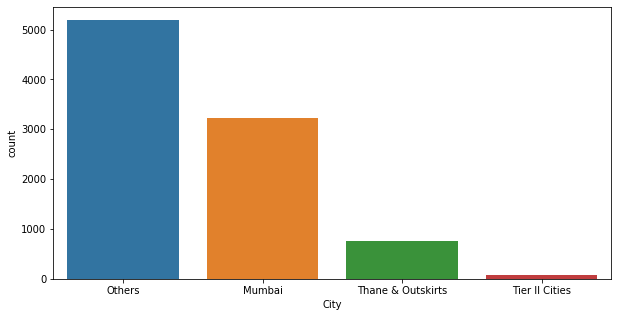

In [21]:
# Plotting the spread of 'City' column
plt.figure(figsize=(10,5))
sns.countplot(leads.City)
plt.show()

#### Analyzing the column 'Specialization'

In [22]:
# Checking the percentage of each category in the 'City' column
(leads.Specialization.value_counts(dropna=False)/len(leads.Specialization))*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

##### Inference:
For the feature 'Specialization', we can see 36% of values are missing. We will not drop the columns as these doesn't look to be skewed. So, we will try to impute values into these records. These may have been missed as the the lead might not have got a suitable option to fill and using a particular value to fill in the missing values, may inappropriately skew one particular value. So, we will replace the null values using 'Other Specialization'.

Also, since there are many categories in this column, we will merege all the Management related Specialization under same category i.e. 'Management Specialization'.

In [23]:
# Imputing the value 'Other Specialization' to the missing values in 'Specialization' column
leads['Specialization'].replace(np.nan,'Other Specialization', inplace=True)

# Merging the Management related categories under 'Management Specialization'
leads['Specialization'].replace(['Finance Management', 
                                 'Human Resource Management', 
                                 'Marketing Management', 
                                 'Operations Management', 
                                 'IT Projects Management', 
                                 'Supply Chain Management', 
                                 'Healthcare Management', 
                                 'Hospitality Management', 
                                 'Retail Management'], 
                                'Management Specialization', inplace=True)

# Checking the percentage of each category in the 'Specialization' column after imputation
(leads.Specialization.value_counts(dropna=False)/len(leads.Specialization))*100

Management Specialization            46.028139
Other Specialization                 36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
E-COMMERCE                            1.212121
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

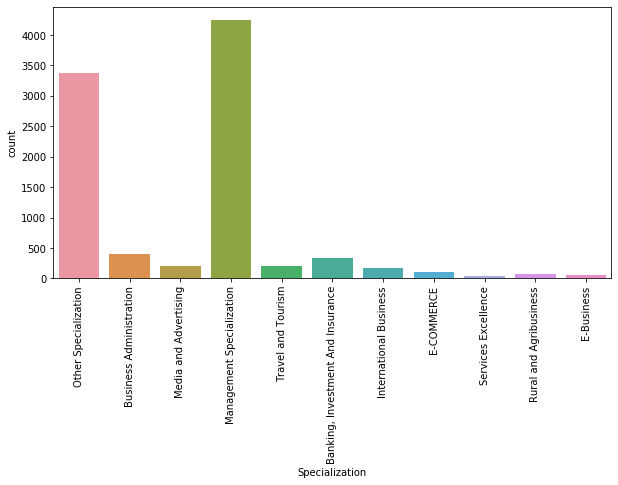

In [24]:
# Plotting the spread of 'Specialization' column
plt.figure(figsize=(10,5))
sns.countplot(leads.Specialization)
plt.xticks(rotation=90)
plt.show()

#### Analyzing the column 'What is your current occupation'

In [25]:
# Checking the percentage of each category in the 'What is your current occupation' column
(leads['What is your current occupation'].value_counts(dropna=False)/len(leads['What is your current occupation']))*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

##### Inference:
For 'What is your current occupation' feature, we can see there are 29% of missing values. We will assign the missing values to the category 'Other'.

In [26]:
# Imputing the value 'Other' to the missing values in 'What is your current occupation' column
leads['What is your current occupation'].replace(np.nan,'Other', inplace=True)

# Checking the percentage of each category in the 'What is your current occupation' column after imputation
(leads['What is your current occupation'].value_counts(dropna=False)/len(leads['What is your current occupation']))*100

Unemployed              60.606061
Other                   29.285714
Working Professional     7.640693
Student                  2.272727
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

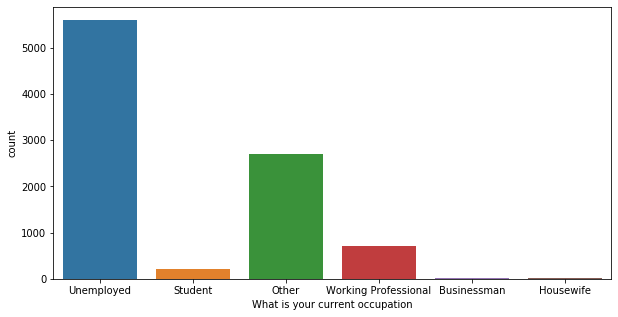

In [27]:
# Plotting the spread of 'What is your current occupation' column
plt.figure(figsize=(10,5))
sns.countplot(leads['What is your current occupation'])
plt.show()

#### Analyzing the column 'What matters most to you in choosing a course'

In [28]:
# Checking the percentage of each category in the 'What matters most to you in choosing a course' column
(leads['What matters most to you in choosing a course'].value_counts(dropna=False)/len(leads['What matters most to you in choosing a course']))*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

##### Inference:
In the feature 'What matters most to you in choosing a course', we could find that the most of the values is in one category. 70% of the field have value as 'Better Career Prospects' and 29% are missing. So, it covers around 99% of the rows and hence the column is highly skewed. So, dropping the column 'What matters most to you in choosing a course'.

In [29]:
# Dropping the 'What matters most to you in choosing a course' column
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

##### Note:
Other columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit' & 'Last Activity' have very low amount of missing values, i.e. less than 1.5%. So, we will drop the missing value rows.

In [30]:
# Dropping remaining rows with missing values
leads.dropna(inplace = True)

In [31]:
# Checking the percentage of null values in all the features after missing value treatment
round((leads.isnull().sum()/len(leads))*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Analyzing other features for skewed data

In [32]:
# Checking the percentage of each category in the 'Lead Origin' column
(leads['Lead Origin'].value_counts()/len(leads['Lead Origin']))*100

Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64

##### Inference:
The data looks good in 'Lead Origin' column. 

In [33]:
# Checking the percentage of each category in the 'Lead Source' column
(leads['Lead Source'].value_counts()/len(leads['Lead Source']))*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Social Media          0.022041
Live Chat             0.022041
Press_Release         0.022041
NC_EDM                0.011020
blog                  0.011020
WeLearn               0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
Pay per Click Ads     0.011020
testone               0.011020
Name: Lead Source, dtype: float64

##### Inference:
The 'Lead Source' column has many categories and most of them have very low values. So we can merge the lowest occurrences to a single category called 'Others'. Also, 'google' & 'Google' can be combined together, 'Facebook' can be combined with 'Social Media' and 'Olark Chat' & 'Live Chat' can be combined together to 'Chat'.

In [34]:
# Converting the values in 'Lead Source' column
leads['Lead Source'].replace('google', 'Google', inplace=True)
leads['Lead Source'].replace('Facebook', 'Social Media', inplace=True)
leads['Lead Source'].replace(['Olark Chat', 
                              'Live Chat'], 'Chat', inplace=True)
leads['Lead Source'].replace(['bing', 
                              'Click2call', 
                              'Press_Release', 
                              'youtubechannel', 
                              'WeLearn', 
                              'welearnblog_Home', 
                              'NC_EDM', 
                              'blog', 
                              'Pay per Click Ads', 
                              'testone'], 'Others', inplace=True)

# Checking the percentage of each category in the 'Lead Source' column
(leads['Lead Source'].value_counts()/len(leads['Lead Source']))*100

Google              31.661891
Direct Traffic      28.025127
Chat                19.340974
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Social Media         0.363676
Others               0.209389
Name: Lead Source, dtype: float64

In [35]:
# Checking the percentage of each category in the 'Do Not Email' column
(leads['Do Not Email'].value_counts()/len(leads['Do Not Email']))*100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

##### Inference:
Dropping the 'Do Not Email' column as it is skewed column and more than 90% of values are assigned to one category

In [36]:
# Dropping the 'Do Not Email' column
leads.drop('Do Not Email', axis=1, inplace=True)

In [37]:
# Checking the percentage of each category in the 'Do Not Call' column
(leads['Do Not Call'].value_counts()/len(leads['Do Not Call']))*100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

##### Inference:
Dropping the 'Do Not Call' column as it is skewed column and more than 90% of values are assigned to one category

In [38]:
# Dropping the 'Do Not Call' column
leads.drop('Do Not Call', axis=1, inplace=True)

In [39]:
# Checking the percentage of each category in the 'Last Activity' column
(leads['Last Activity'].value_counts()/len(leads['Last Activity']))*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Visited Booth in Tradeshow       0.011020
Resubscribed to emails           0.011020
Name: Last Activity, dtype: float64

##### Inference
The 'Last Activity' column has many low occurring values below 1% and we will combine them together to one category called 'Others'.

In [40]:
# Converting the values in 'Last Activity' column
leads['Last Activity'].replace(['Unreachable', 
                              'Unsubscribed', 
                              'Had a Phone Conversation', 
                              'View in browser link Clicked', 
                              'Approached upfront', 
                              'Email Marked Spam', 
                              'Email Received', 
                              'Resubscribed to emails', 
                              'Visited Booth in Tradeshow'], 'Others', inplace=True)

# Checking the percentage of each category in the 'Last Activity' column
(leads['Last Activity'].value_counts()/len(leads['Last Activity']))*100

Email Opened                 37.822350
SMS Sent                     29.931673
Olark Chat Conversation      10.711924
Page Visited on Website       7.053119
Converted to Lead             4.716773
Email Bounced                 3.438395
Email Link Clicked            2.942473
Others                        2.104915
Form Submitted on Website     1.278378
Name: Last Activity, dtype: float64

In [41]:
# Checking the percentage of each category in the 'Search' column
(leads['Search'].value_counts()/len(leads['Search']))*100

No     99.845713
Yes     0.154287
Name: Search, dtype: float64

##### Inference:
Dropping the 'Search' column as it is skewed column and more than 90% of values are assigned to one category.

In [42]:
# Dropping the 'Search' column
leads.drop('Search', axis=1, inplace=True)

In [43]:
# Checking the percentage of each category in the 'Newspaper Article' column
(leads['Newspaper Article'].value_counts()/len(leads['Newspaper Article']))*100

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

##### Inference:
Dropping the 'Newspaper Article' column as it is skewed column and more than 90% of values are assigned to one category.

In [44]:
# Dropping the 'Newspaper Article' column
leads.drop('Newspaper Article', axis=1, inplace=True)

In [45]:
# Checking the percentage of each category in the 'X Education Forums' column
(leads['X Education Forums'].value_counts()/len(leads['X Education Forums']))*100

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64

##### Inference:
Dropping the 'X Education Forums' column as it is skewed column and more than 90% of values are assigned to one category.

In [46]:
# Dropping the 'X Education Forums' column
leads.drop('X Education Forums', axis=1, inplace=True)

In [47]:
# Checking the percentage of each category in the 'Newspaper' column
(leads['Newspaper'].value_counts()/len(leads['Newspaper']))*100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

##### Inference:
Dropping the 'Newspaper' column as it is skewed column and more than 90% of values are assigned to one category.

In [48]:
# Dropping the 'Newspaper' column
leads.drop('Newspaper', axis=1, inplace=True)

In [49]:
# Checking the percentage of each category in the 'Digital Advertisement' column
(leads['Digital Advertisement'].value_counts()/len(leads['Digital Advertisement']))*100

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64

##### Inference:
Dropping the 'Digital Advertisement' column as it is skewed column and more than 90% of values are assigned to one category.

In [50]:
# Dropping the 'Digital Advertisement' column
leads.drop('Digital Advertisement', axis=1, inplace=True)

In [51]:
# Checking the percentage of each category in the 'Through Recommendations' column
(leads['Through Recommendations'].value_counts()/len(leads['Through Recommendations']))*100

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64

##### Inference:
Dropping the 'Through Recommendations' column as it is skewed column and more than 90% of values are assigned to one category.

In [52]:
# Dropping the 'Through Recommendations' column
leads.drop('Through Recommendations', axis=1, inplace=True)

In [53]:
# Checking the percentage of each category in the 'A free copy of Mastering The Interview' column
(leads['A free copy of Mastering The Interview'].value_counts()/len(leads['A free copy of Mastering The Interview']))*100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

##### Inference:
The data looks good in 'A free copy of Mastering The Interview' column.

In [54]:
# Checking the percentage of each category in the 'Last Notable Activity' column
(leads['Last Notable Activity'].value_counts()/len(leads['Last Notable Activity']))*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Email Received                   0.011020
Resubscribed to emails           0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Name: Last Notable Activity, dtype: float64

##### Inference
The 'Last Notable Activity' column has many low occurring values below 1% and we will combine them together to one category called 'Others'.

In [55]:
# Converting the values in 'Last Notable Activity' column
leads['Last Notable Activity'].replace(['Email Bounced', 
                                        'Unsubscribed', 
                                        'Unreachable', 
                                        'Had a Phone Conversation', 
                                        'Email Marked Spam', 
                                        'View in browser link Clicked', 
                                        'Resubscribed to emails', 
                                        'Email Received', 
                                        'Approached upfront', 
                                        'Form Submitted on Website'], 'Others', inplace=True)

# Checking the percentage of each category in the 'Last Notable Activity' column
(leads['Last Notable Activity'].value_counts()/len(leads['Last Notable Activity']))*100

Modified                   36.003967
Email Opened               31.110866
SMS Sent                   23.716112
Page Visited on Website     3.504518
Olark Chat Conversation     2.016751
Email Link Clicked          1.906546
Others                      1.741239
Name: Last Notable Activity, dtype: float64

In [56]:
# Displaying 'Converted' Field values
leads.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

##### Inference:
The Target variable 'Converted' can only have values 0 and 1 implying Converted and Not Converted.

In [57]:
# Checking the field descriptions after the Data Cleaning process
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [58]:
# Finding Current Conversion rate using converted field
conversion_rate = (sum(leads['Converted'])/len(leads['Converted']))*100
conversion_rate

37.85541106458012

##### Inference:
The Conversion rate of the leads in the dataset is currently at 37.85%.

In [59]:
# Checking the shape of the dataframe after Data Cleaning process
leads.shape

(9074, 12)

In [60]:
# Data retained after the Data Cleaning process
((len(leads)/len(leads_original))*100)

98.2034632034632

##### Inference
After the Data Cleaning process, we have 98.2% of rows remaining from the original dataset and 12 columns for the model building.

### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis - Categorical Features

We will be plotting the Countplot of all the categorical features with respect to the Target variable, i.e. Converted column to get an insight on the fact that how the values in each feature is impacting the conversion of a lead.

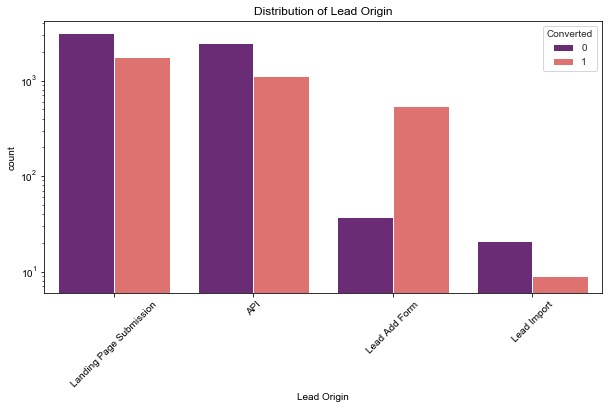

In [61]:
# Countplot for 'Lead Origin' column
col = leads['Lead Origin']
plt.figure(figsize = [10,5])
plt.title("Distribution of Lead Origin")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Lead Origin are as below -
- Landing Page Submission & API has the highest number of leads and have the most number of conversions.
- Lead Import has the lowest number of leads and has the least number of conversions.
- Lead Add Form is the only category which has a very high conversion rate instead of having very few leads.

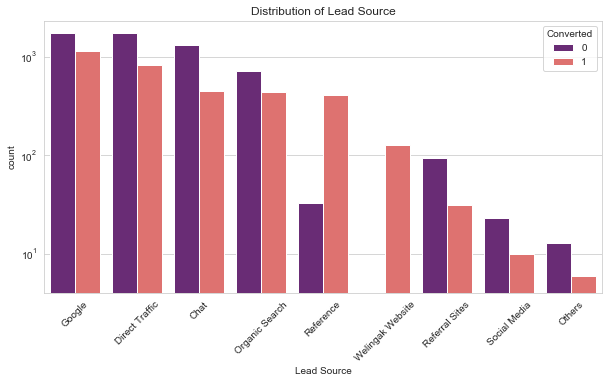

In [62]:
# Countplot for 'Lead Source' column
col = leads['Lead Source']
plt.figure(figsize = [10,5])
plt.title("Distribution of Lead Source")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Lead Source are as below -
- Google and Direct Traffic has the highest number of leads and Google has most number of lead conversions.
- Others category have the lowest number of leads and least number of conversions.
- Reference & Welingak Website are the only categories having very high lead conversion rate.

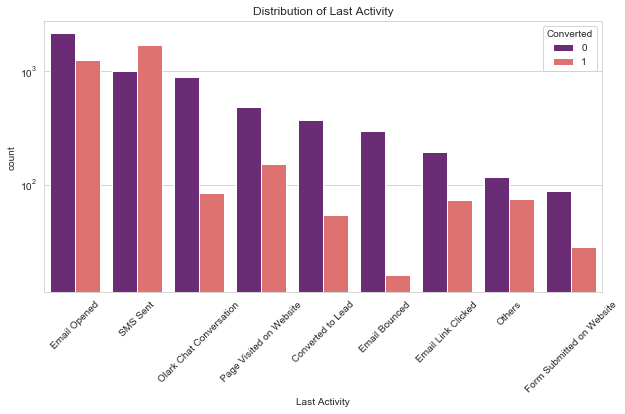

In [63]:
# Countplot for 'Last Activity' column
col = leads['Last Activity']
plt.figure(figsize = [10,5])
plt.title("Distribution of Last Activity")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Last Activity are as below -
- Email Opened has the most number of leads.
- SMS Sent has the highest number of conversions and the only category having very high conversion rate instead of very high number of leads.
- Olark Chat Conversation & Email Bounced has the least conversion rate instead of having high number of leads.

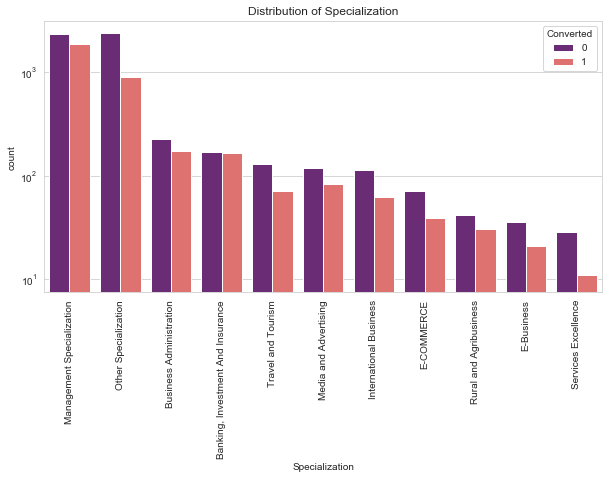

In [64]:
# Countplot for 'Specialization' column
col = leads['Specialization']
plt.figure(figsize = [10,5])
plt.title("Distribution of Specialization")
plt.yscale('log')
plt.xticks(rotation=90)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Specialization are as below -
- Management Specialization has the highest number of leads and has the highest lead conversion rate.
- Services Excellence has the least number of leads and least lead conversion rate.

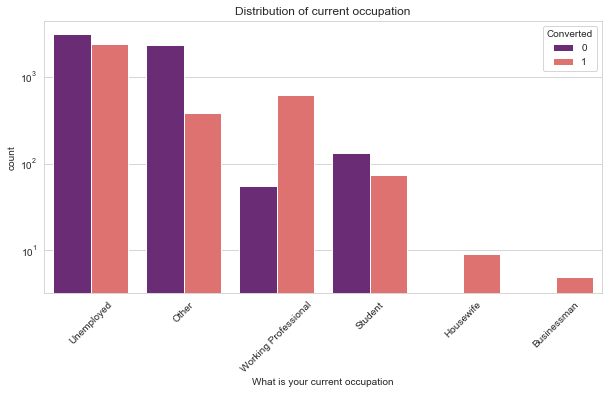

In [65]:
# Countplot for 'What is your current occupation' column
col = leads['What is your current occupation']
plt.figure(figsize = [10,5])
plt.title("Distribution of current occupation")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Current occupation are as below -
- Unemployed people have the highest number of leads.
- Housewife & Businessman have the least number of leads and but also they have the 100% conversion rate.
- Working Professional have a high number of leads and has high lead conversion rate.

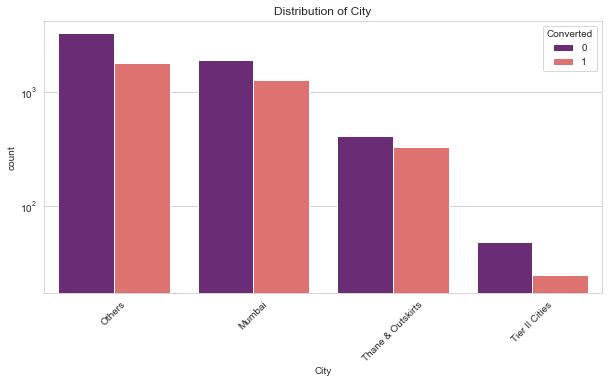

In [66]:
# Countplot for 'City' column
col = leads['City']
plt.figure(figsize = [10,5])
plt.title("Distribution of City")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of City are as below -
- Mumbai and Other cities have a high number of leads and have a good conversion rate.
- Tier II Cities have the lowest number of leads and least conversion rate among all.

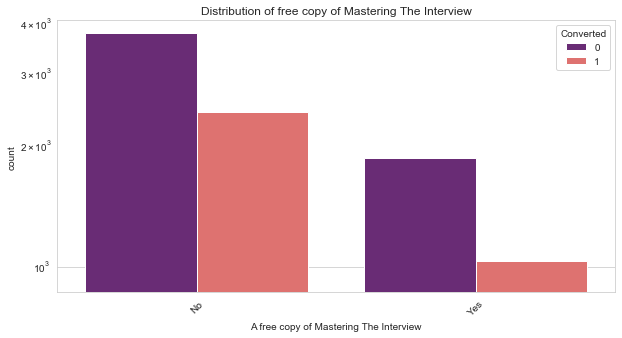

In [67]:
# Countplot for 'A free copy of Mastering The Interview' column
col = leads['A free copy of Mastering The Interview']
plt.figure(figsize = [10,5])
plt.title("Distribution of free copy of Mastering The Interview")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

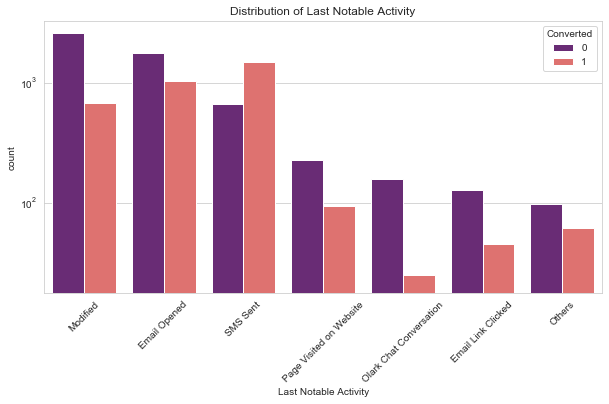

In [68]:
# Countplot for 'Last Notable Activity' column
col = leads['Last Notable Activity']
plt.figure(figsize = [10,5])
plt.title("Distribution of Last Notable Activity")
plt.yscale('log')
plt.xticks(rotation=45)
sns.set_style("whitegrid")
sns.countplot(col, order=col.value_counts().index, hue=leads.Converted, palette='magma')
plt.show()

##### Inference:
Observations from Distribution plot of Last Notable Activity are as below -
- Last Notable Activity of Modified has the highest number of leads but the conversion rate is not the highest.
- Last Notable Activity of SMS Sent has the highest lead Conversion rate having a good number of leads.
- Last Notable Activity of Olark Chat Conversation & Email Link Clicked has the least conversion rate. 

#### Univariate Analysis - Numerical Features

We will be plotting the Boxplot of the numerical features present in the dataset, with respect to the Target variable Converted and will treat if any outliers present in the data.

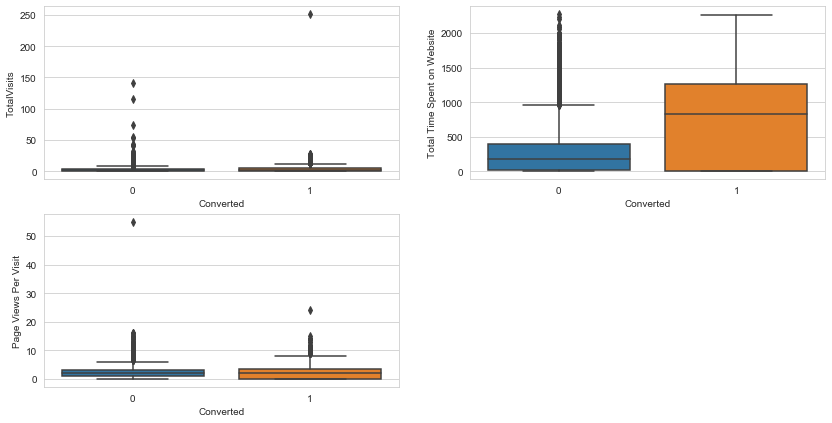

In [69]:
# Plotting box plot for all the numerical columns
plt.figure(figsize=(14,7))
num_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for feature in enumerate(num_features):
    plt.subplot(2,2,feature[0]+1)
    sns.boxplot(x=leads.Converted, y=leads[feature[1]])

##### Inference:
We can observe some outliers in all the numerical features and we will use capping to remove the outliers in the data.

In [70]:
# Checkin the Descriptive Statistics of the numerical columns
leads[num_features].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


##### Inference:
From the Quantiles we can observe that -
- There is a huge difference in the mean and 50th percentile(median) value of 'Total Time Spent on Website'. Looks like it might be due to the skewed data at higher end.
- In the TotalVisits & Page Views Per Visit columns, we can see there is a very big difference between the 99th percentile value and the max value indicationg skewed data at higher end.

So, to treat the outliers, we will cap the maximum value of the numerical columns to 95th percentile value.

In [71]:
# Outlier treatment for the numerical columns
for feature in num_features:
    Q3=leads[feature].quantile(0.95)
    leads[feature][leads[feature] >= Q3] = Q3

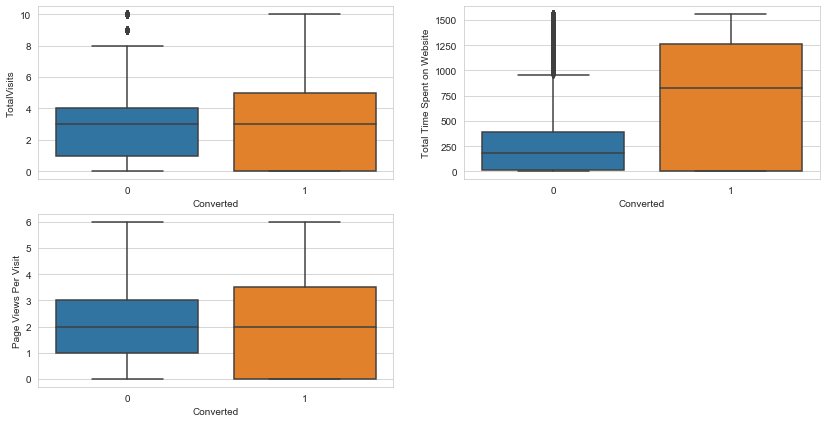

In [72]:
# Plotting box plot for all the numerical columns after outlier treatment
plt.figure(figsize=(14,7))
for feature in enumerate(num_features):
    plt.subplot(2,2,feature[0]+1)
    sns.boxplot(x=leads.Converted, y=leads[feature[1]])

##### Inference:
After the outlier treatment, we can observe that -
- TotalVisits column has almost the similar median for converted and not converted values and there is no indication if this feature would be helpful for lead conversion.
- Total Time Spent on Website column has a much higher median value for Converted leads. This means that more the time spent on Website, more the chances of Converting the lead and this column would be very helpful in determining if the lead can be converted.
- Page Views Per Visit column has almost the similar median for converted and not converted values and there is no indication if this feature would be helpful for lead conversion.

#### Bivariate Analysis

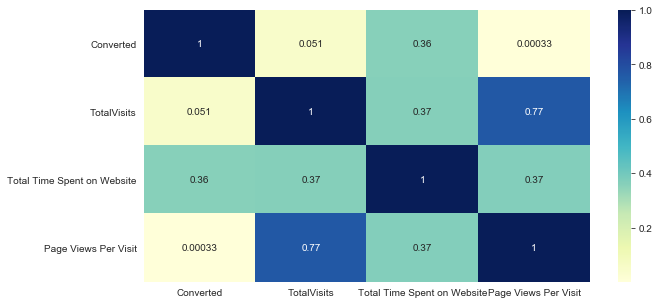

In [73]:
# Plotting the Heatmap to find the correlation between the numerical columns
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(), annot=True, cmap='YlGnBu')
plt.show()

##### Inference:
From the Correlation plot/Heatmap, we can observe that the columns Page Views Per Visit & TotalVisits have a high correlation of 0.77 and when building the model, this would affect the model due to multi-collinearity.

### DATA PREPARATION

In [74]:
# Checking the Categorical Columns for multiple levels
leads.nunique()

Lead Origin                                  4
Lead Source                                  9
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1451
Page Views Per Visit                        91
Last Activity                                9
Specialization                              11
What is your current occupation              6
City                                         4
A free copy of Mastering The Interview       2
Last Notable Activity                        7
dtype: int64

##### Inference:
We will be creating Dummy Variables for the below columns -
- Lead Origin
- Lead Source
- Last Activity
- Specialization
- What is your current occupation
- City
- Last Notable Activity

Also, we will be converting the Binary Variable 'A free copy of Mastering The Interview' from Yes/No to 0 & 1.

In [75]:
# Converting the binary values in 'A free copy of Mastering The Interview' from Yes/No to 0 & 1

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'] = leads[['A free copy of Mastering The Interview']].apply(binary_map)

In [76]:
# Creating a dummy variable and dropping the first column
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [77]:
# Creating a dummy variable and dropping the Others column
dummy = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
dummy = dummy.drop('Lead Source_Others', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [78]:
# Creating a dummy variable and dropping the Others column
dummy = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
dummy = dummy.drop('Last Activity_Others', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [79]:
# Creating a dummy variable and dropping the Other Specialization column
dummy = pd.get_dummies(leads['Specialization'], prefix='Specialization')
dummy = dummy.drop('Specialization_Other Specialization', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [80]:
# Creating a dummy variable and dropping the Other column
dummy = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
dummy = dummy.drop('What is your current occupation_Other', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [81]:
# Creating a dummy variable and dropping the Others column
dummy = pd.get_dummies(leads['City'], prefix='City')
dummy = dummy.drop('City_Others', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [82]:
# Creating a dummy variable and dropping the Others column
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')
dummy = dummy.drop('Last Notable Activity_Others', 1)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [83]:
# Dropping the original columns of the variables for which dummies have been created
leads.drop(['Lead Origin', 
            'Lead Source', 
            'Last Activity', 
            'Specialization', 
            'What is your current occupation', 
            'City', 
            'Last Notable Activity'], axis=1, inplace=True)

In [84]:
# Checking the shape of the dataframe after creating dummies
leads.shape

(9074, 48)

In [85]:
# Checking the data
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct Traffic,...,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [86]:
# Checking the column information in the dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Chat                                      9074

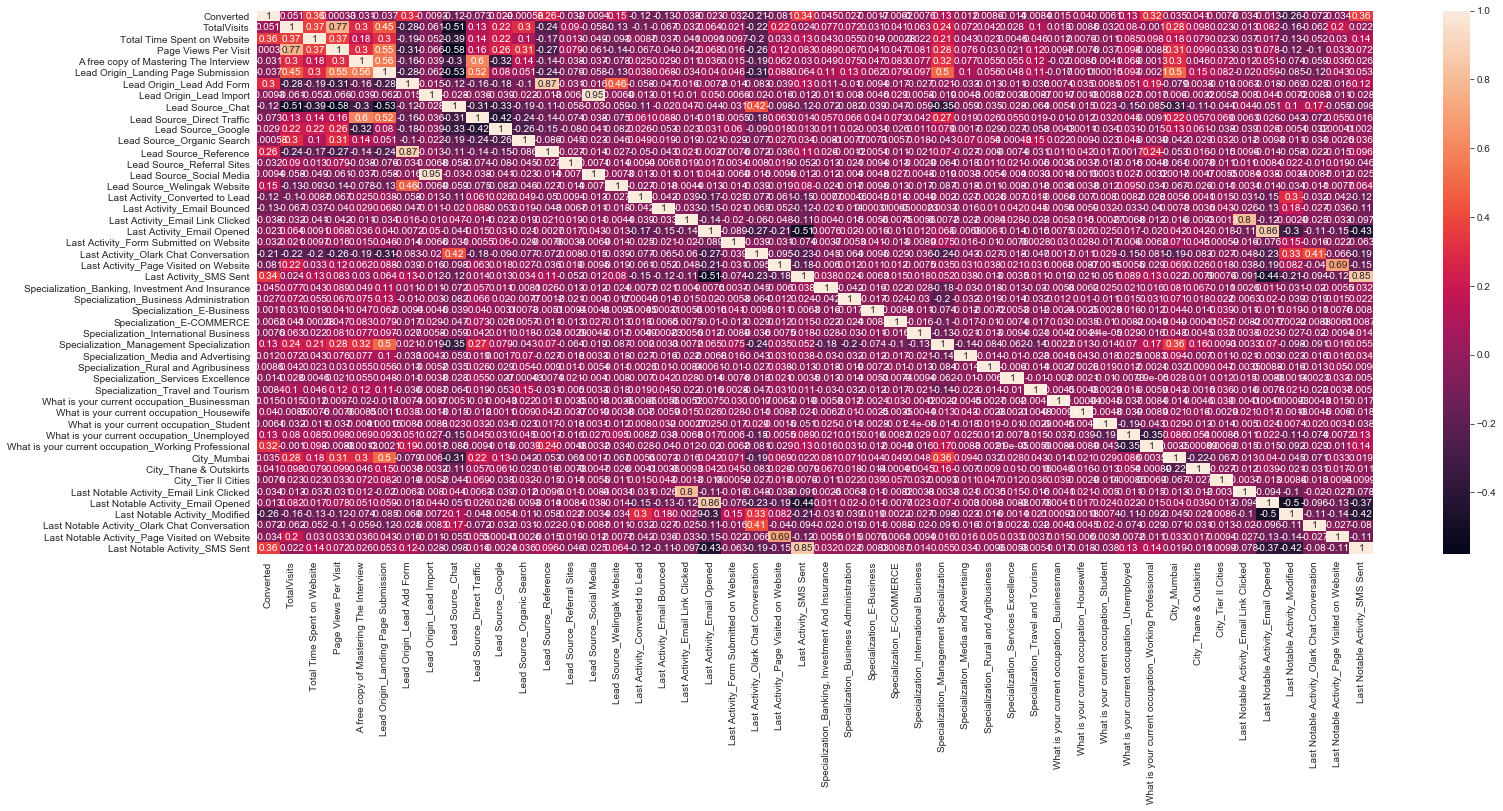

In [87]:
# Plotting the heatmap of the correlation matrix
plt.figure(figsize = (25,10))
sns.heatmap(leads.corr(),annot = True)
plt.show()

##### Inference:
Looking at the heatmap we can find a lot of features which can show multi-collinearity, but we cannot confirm from the plot. We will look into those when building the model.

### MODEL  BUILDING

#### Train-Test Split

In [88]:
# Importing the required library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

# Putting response variable to y
y = leads['Converted']

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [90]:
# Importing the required library
from sklearn.preprocessing import StandardScaler

# Scaling the continuous variables using Standard Scaler method
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Chat,Lead Source_Direct Traffic,Lead Source_Google,...,What is your current occupation_Working Professional,City_Mumbai,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,-0.432779,-0.150296,-0.155018,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1012,-0.432779,-0.543632,-0.155018,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
9226,-1.150329,-0.904666,-1.265540,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4750,-0.432779,1.717578,-0.155018,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7987,0.643547,2.053909,0.122613,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#### Building Model #1

In [91]:
# Importing required library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Running Statsmodel
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.0
Date:                Tue, 12 Jan 2021   Deviance:                       4958.0
Time:                        01:04:36   Pearson chi2:                 6.19e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9138      0.784     -1.165      0.244      -2.451       0.623
TotalVisits                                              0.3258      0.058      5.652      0.000       0.213       0.439
Total Time Spent on Website                              1.1447      0.042     27.306      0.000       1.063       1.227
Page Views Per Visit                                    -0.3494      0.065     -5.408      0.000      -0.476      -0.223
A free copy of Mastering The Interview                  -0.2406      0.112     -2.150      0.032      -0.460      -0.021
Lead Origin_Landing Page Submission                     -0.8219      0.142     -5.771      0.000      -1.101      -0.543
Lead Origin_Lead Add Form                                0.8454      0.983      0.860      0.390      -1.082       2.772
Lead Origin_Lead Import                                  0.1145      1.414      0.081      0.935      -2.657       2.886
Lead Source_Chat                                         1.0524      0.749      1.406      0.160      -0.415       2.519
Lead Source_Direct Traffic                              -0.3292      0.745     -0.442      0.659      -1.790       1.131
Lead Source_Google                                      -0.0908      0.741     -0.122      0.903      -1.544       1.362
Lead Source_Organic Search                              -0.2378      0.749     -0.317      0.751      -1.706       1.230
Lead Source_Reference                                    2.0257      0.987      2.052      0.040       0.091       3.960
Lead Source_Referral Sites                              -0.3056      0.819     -0.373      0.709      -1.911       1.300
Lead Source_Social Media                                 0.4510      1.520      0.297      0.767      -2.528       3.430
Lead Source_Welingak Website                             4.4130      1.206      3.660      0.000       2.050       6.776
Last Activity_Converted to Lead                         -0.8549      0.379     -2.255      0.024      -1.598      -0.112
Last Activity_Email Bounced                             -2.4979      0.456     -5.482      0.000      -3.391      -1.605
Last Activity_Email Link Clicked                        -0.2209      0.487     -0.454      0.650      -1.175       0.733
Last Activity_Email Opened                               0.1379      0.334      0.412      0.680      -0.518       0.793
Last Activity_Form Submitted on Website                 -0.5410      0.458     -1.181      0.238      -1.439       0.357
Last Activity_Olark Chat Conversation                   -1.1446      0.359     -3.188      0.001      -1.848      -0.441
Last Activity_Page Visited on Website                   -0

#### Feature Selection using RFE

In [92]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Running RFE using 15 features
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [93]:
# Displaying all the features and the RFE Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('A free copy of Mastering The Interview', False, 26),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Chat', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 23),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Form Submitted on Website', False, 20),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_SMS Sent', Tru

In [94]:
# Columns chosen by RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

##### Inference:
We will be using the above features picked by RFE to build our model.

In [95]:
# Columns not chosen by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Chat', 'Lead Source_Reference', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'City_Mumbai',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activ

#### Building Model #2

In [96]:
# Running Statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.4
Date:                Tue, 12 Jan 2021   Deviance:                       5220.8
Time:                        01:04:45   Pearson chi2:                 6.16e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9376      0.110     -8.549      0.000      -1.153      -0.723
Total Time Spent on Website                              1.1577      0.040     28.688      0.000       1.079       1.237
Lead Origin_Lead Add Form                                2.1194      0.227      9.347      0.000       1.675       2.564
Lead Source_Direct Traffic                              -1.7908      0.119    -15.031      0.000      -2.024      -1.557
Lead Source_Google                                      -1.3192      0.113    -11.691      0.000      -1.540      -1.098
Lead Source_Organic Search                              -1.5935      0.136    -11.735      0.000      -1.860      -1.327
Lead Source_Referral Sites                              -1.6692      0.351     -4.762      0.000      -2.356      -0.982
Lead Source_Welingak Website                             1.9794      0.755      2.620      0.009       0.499       3.460
Last Activity_Email Bounced                             -2.0586      0.373     -5.513      0.000      -2.790      -1.327
Last Activity_Olark Chat Conversation                   -1.3383      0.163     -8.187      0.000      -1.659      -1.018
Last Activity_SMS Sent                                   1.2164      0.075     16.311      0.000       1.070       1.363
What is your current occupation_Businessman              2.5542      1.064      2.401      0.016       0.469       4.639
What is your current occupation_Housewife               24.1344   1.55e+04      0.002      0.999   -3.04e+04    3.05e+04
What is your current occupation_Student                  1.4118      0.229      6.161      0.000       0.963       1.861
What is your current occupation_Unemployed               1.2789      0.087     14.644      0.000       1.108       1.450
What is your current occupation_Working Professional     3.7513      0.198     18.957      0.000       3.363       4.139
========================================================================================================================
"""

##### Inference:
From the above, we could observe the p-value of What is your current occupation_Housewife is very high. So, we will drop the feature and rebuild the model.

In [97]:
# Dropping the column What is your current occupation_Housewife
col =col.drop('What is your current occupation_Housewife')

#### Building Model #3

In [98]:
# Running Statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.3
Date:                Tue, 12 Jan 2021   Deviance:                       5238.6
Time:                        01:04:45   Pearson chi2:                 6.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9151      0.109     -8.390      0.000      -1.129      -0.701
Total Time Spent on Website                              1.1568      0.040     28.733      0.000       1.078       1.236
Lead Origin_Lead Add Form                                2.1845      0.227      9.618      0.000       1.739       2.630
Lead Source_Direct Traffic                              -1.7825      0.119    -14.993      0.000      -2.016      -1.549
Lead Source_Google                                      -1.3145      0.113    -11.671      0.000      -1.535      -1.094
Lead Source_Organic Search                              -1.5748      0.135    -11.635      0.000      -1.840      -1.310
Lead Source_Referral Sites                              -1.6673      0.350     -4.764      0.000      -2.353      -0.981
Lead Source_Welingak Website                             1.9222      0.756      2.544      0.011       0.441       3.403
Last Activity_Email Bounced                             -2.0656      0.373     -5.535      0.000      -2.797      -1.334
Last Activity_Olark Chat Conversation                   -1.3447      0.163     -8.232      0.000      -1.665      -1.025
Last Activity_SMS Sent                                   1.2069      0.074     16.210      0.000       1.061       1.353
What is your current occupation_Businessman              2.5165      1.065      2.362      0.018       0.429       4.604
What is your current occupation_Student                  1.3827      0.229      6.037      0.000       0.934       1.832
What is your current occupation_Unemployed               1.2516      0.087     14.459      0.000       1.082       1.421
What is your current occupation_Working Professional     3.7219      0.198     18.845      0.000       3.335       4.109
========================================================================================================================
"""

##### Inference:
The p-values look good. Let's look at the VIF.

In [99]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,2.73
3,Lead Source_Google,1.79
2,Lead Source_Direct Traffic,1.76
1,Lead Origin_Lead Add Form,1.74
9,Last Activity_SMS Sent,1.55
4,Lead Source_Organic Search,1.36
13,What is your current occupation_Working Profes...,1.35
6,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.19
8,Last Activity_Olark Chat Conversation,1.10


##### Inference:
The VIF of all the features are below 5 and p-values are also below 0.05, which means this is a good model. But we see some features with p-value greater than 0 and we will try to drop them, to make the performance of the model better. So, we will drop What is your current occupation_Businessman and rebuild the model.

In [100]:
# Dropping the column What is your current occupation_Housewife
col =col.drop('What is your current occupation_Businessman')

#### Building Model #4

In [101]:
# Running Statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.2
Date:                Tue, 12 Jan 2021   Deviance:                       5244.3
Time:                        01:04:47   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9030      0.109     -8.304      0.000      -1.116      -0.690
Total Time Spent on Website                              1.1569      0.040     28.763      0.000       1.078       1.236
Lead Origin_Lead Add Form                                2.2045      0.227      9.700      0.000       1.759       2.650
Lead Source_Direct Traffic                              -1.7790      0.119    -14.977      0.000      -2.012      -1.546
Lead Source_Google                                      -1.3128      0.113    -11.664      0.000      -1.533      -1.092
Lead Source_Organic Search                              -1.5633      0.135    -11.571      0.000      -1.828      -1.299
Lead Source_Referral Sites                              -1.6672      0.350     -4.767      0.000      -2.353      -0.982
Lead Source_Welingak Website                             1.9065      0.756      2.522      0.012       0.425       3.388
Last Activity_Email Bounced                             -2.0701      0.373     -5.549      0.000      -2.801      -1.339
Last Activity_Olark Chat Conversation                   -1.3484      0.163     -8.259      0.000      -1.668      -1.028
Last Activity_SMS Sent                                   1.2017      0.074     16.157      0.000       1.056       1.348
What is your current occupation_Student                  1.3681      0.229      5.976      0.000       0.919       1.817
What is your current occupation_Unemployed               1.2375      0.086     14.365      0.000       1.069       1.406
What is your current occupation_Working Professional     3.7070      0.197     18.788      0.000       3.320       4.094
========================================================================================================================
"""

In [102]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.72
3,Lead Source_Google,1.79
2,Lead Source_Direct Traffic,1.76
1,Lead Origin_Lead Add Form,1.74
9,Last Activity_SMS Sent,1.55
4,Lead Source_Organic Search,1.35
12,What is your current occupation_Working Profes...,1.34
6,Lead Source_Welingak Website,1.33
0,Total Time Spent on Website,1.19
8,Last Activity_Olark Chat Conversation,1.10


##### Inference:
Again, The VIF of all the features are below 5 and p-values are also below 0.05, which means this is a good model. But we see some features with p-value greater than 0 and we will try to drop them, to make the performance of the model better. So, we will drop Lead Source_Welingak Website and rebuild the model.

In [103]:
# Dropping the column What is your current occupation_Housewife
col =col.drop('Lead Source_Welingak Website')

#### Building Model #5

In [104]:
# Running Statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.2
Date:                Tue, 12 Jan 2021   Deviance:                       5254.5
Time:                        01:04:47   Pearson chi2:                 6.28e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9069      0.109     -8.339      0.000      -1.120      -0.694
Total Time Spent on Website                              1.1569      0.040     28.763      0.000       1.078       1.236
Lead Origin_Lead Add Form                                2.5251      0.217     11.638      0.000       2.100       2.950
Lead Source_Direct Traffic                              -1.7785      0.119    -14.975      0.000      -2.011      -1.546
Lead Source_Google                                      -1.3121      0.113    -11.660      0.000      -1.533      -1.092
Lead Source_Organic Search                              -1.5632      0.135    -11.572      0.000      -1.828      -1.298
Lead Source_Referral Sites                              -1.6663      0.350     -4.765      0.000      -2.352      -0.981
Last Activity_Email Bounced                             -2.0204      0.364     -5.547      0.000      -2.734      -1.307
Last Activity_Olark Chat Conversation                   -1.3418      0.163     -8.240      0.000      -1.661      -1.023
Last Activity_SMS Sent                                   1.2045      0.074     16.203      0.000       1.059       1.350
What is your current occupation_Student                  1.3573      0.230      5.903      0.000       0.907       1.808
What is your current occupation_Unemployed               1.2407      0.086     14.395      0.000       1.072       1.410
What is your current occupation_Working Professional     3.6985      0.198     18.723      0.000       3.311       4.086
========================================================================================================================
"""

In [105]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.72
3,Lead Source_Google,1.79
2,Lead Source_Direct Traffic,1.76
8,Last Activity_SMS Sent,1.55
1,Lead Origin_Lead Add Form,1.40
4,Lead Source_Organic Search,1.35
11,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.19
7,Last Activity_Olark Chat Conversation,1.10
6,Last Activity_Email Bounced,1.07


##### Inference:
Now, there are no p-values for the features and the VIFs are very below 5. So, we can conclude Model #5 is the Final model having 12 features. 

#### Evaluating the Model

In [106]:
# Predicted values on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.054205
1012    0.162971
9226    0.620523
4750    0.623916
7987    0.894358
1281    0.792957
2880    0.037084
4971    0.925913
7536    0.717389
1248    0.881232
dtype: float64

In [107]:
# Creating a dataframe with Actual Converted value and predicted Converted Probability
y_train_pred_final = pd.DataFrame({'Converted_Actual':y_train.values, 'Converted_Predicted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob
3009,0,0.054205
1012,0,0.162971
9226,0,0.620523
4750,1,0.623916
7987,1,0.894358


In [108]:
# Creating a new column 'Converted_Predicted' with 1 if Converted_Predicted_Prob > 0.5 else 0
y_train_pred_final['Converted_Predicted'] = y_train_pred_final.Converted_Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Creating a new column 'Lead_Score' for all the leads
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Predicted_Prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob,Converted_Predicted,Lead_Score
3009,0,0.054205,0,5
1012,0,0.162971,0,16
9226,0,0.620523,1,62
4750,1,0.623916,1,62
7987,1,0.894358,1,89


##### Inference:
The Lead Score of the Predictions in the Train Set can be above.

#### Finding the Performance Metrices

In [109]:
# Creating the Confusion Matrix for the model
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Predicted)
confusion

array([[3441,  464],
       [ 739, 1707]], dtype=int64)

In [110]:
# Confusion Matrix Values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Accuracy of the model
accuracy = metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Predicted)

# Sensitivity of the model
sensitivity = TP / float(TP+FN)

# Specificity of the model
specificity = TN / float(TN+FP)

# False Positive Rate of the model
false_p_rate = FP/ float(TN+FP)

# Positive Predictive Value of the model
pos_pred_val = TP / float(TP+FP)

# Negative predictive value of the model
neg_pred_val = TN / float(TN+ FN)

print ('*****Train Set Performance Metrics*****')                          
print ('* Accuracy                 : ', round(accuracy*100, 2), '% *')
print ('* Sensitivity              : ', round(sensitivity*100, 2), '% *')  
print ('* Specificity              : ', round(specificity*100, 2), '% *')  
print ('* False Positive Rate      : ', round(false_p_rate*100, 2), '% *')  
print ('* Positive Predicted Value : ', round(pos_pred_val*100, 2), '% *')  
print ('* Negative Predicted Value : ', round(neg_pred_val*100, 2), '% *')
print ('***************************************')

*****Train Set Performance Metrics*****
* Accuracy                 :  81.06 % *
* Sensitivity              :  69.79 % *
* Specificity              :  88.12 % *
* False Positive Rate      :  11.88 % *
* Positive Predicted Value :  78.63 % *
* Negative Predicted Value :  82.32 % *
***************************************


#### Plotting the ROC Curve

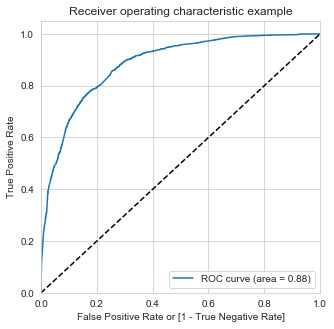

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Predicted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted_Actual, y_train_pred_final.Converted_Predicted_Prob)

##### Inference:
The Area under ROC Curve is coming out to be 0.88. It looks like a good value and we can proceed with the model. 

#### Finding Optimal Cut-off point

In [113]:
# Creating columns with different probability cutoffs in the y_train_pred_final dataset 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Predicted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob,Converted_Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.054205,0,5,1,0,0,0,0,0,0,0,0,0
1012,0,0.162971,0,16,1,1,0,0,0,0,0,0,0,0
9226,0,0.620523,1,62,1,1,1,1,1,1,1,0,0,0
4750,1,0.623916,1,62,1,1,1,1,1,1,1,0,0,0
7987,1,0.894358,1,89,1,1,1,1,1,1,1,1,1,0


In [114]:
# Calculating the accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.598174     0.980785     0.358515
0.2          0.2  0.754212     0.917007     0.652241
0.3          0.3  0.784128     0.864677     0.733675
0.4          0.4  0.810581     0.761652     0.841229
0.5          0.5  0.810581     0.697874     0.881178
0.6          0.6  0.805385     0.639411     0.909347
0.7          0.7  0.777673     0.517580     0.940589
0.8          0.8  0.759565     0.428455     0.966965
0.9          0.9  0.705401     0.253475     0.988476


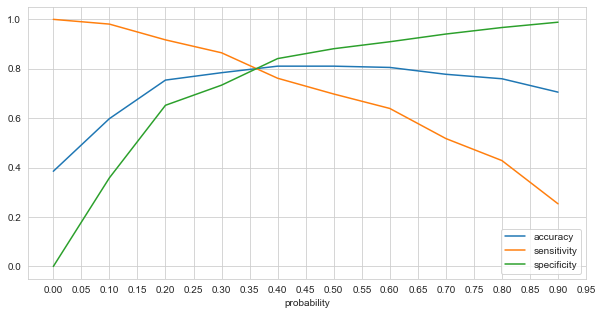

In [115]:
# Plotting the accuracy sensitivity and specificity for various probabilities to find the cut-off
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,5))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### Inference:
From the above curve, we can observe that 0.36 is the optimum point to take as a cut-off probability.

In [116]:
# Predicting the response variable again with new cut-off of 0.36
y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_Predicted_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob,Converted_Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
3009,0,0.054205,0,5,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.162971,0,16,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.620523,1,62,1,1,1,1,1,1,1,0,0,0,1
4750,1,0.623916,1,62,1,1,1,1,1,1,1,0,0,0,1
7987,1,0.894358,1,89,1,1,1,1,1,1,1,1,1,0,1


#### Finding Performance Metrices with optimal cut-off

In [117]:
# Creating the Confusion Matrix for the model
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final.final_prediction)
confusion

array([[3180,  725],
       [ 523, 1923]], dtype=int64)

In [118]:
# Confusion Matrix Values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Accuracy of the model
accuracy = metrics.accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.final_prediction)

# Sensitivity of the model
sensitivity = TP / float(TP+FN)

# Specificity of the model
specificity = TN / float(TN+FP)

# False Positive Rate of the model
false_p_rate = FP/ float(TN+FP)

# Positive Predictive Value of the model
pos_pred_val = TP / float(TP+FP)

# Negative predictive value of the model
neg_pred_val = TN / float(TN+ FN)
                          
print ('*****Train Set Performance Metrics*****')                          
print ('* Accuracy                 : ', round(accuracy*100, 2), '% *')
print ('* Sensitivity              : ', round(sensitivity*100, 2), '% *')  
print ('* Specificity              : ', round(specificity*100, 2), '% *')  
print ('* False Positive Rate      : ', round(false_p_rate*100, 2), '% *')  
print ('* Positive Predicted Value : ', round(pos_pred_val*100, 2), '% *')  
print ('* Negative Predicted Value : ', round(neg_pred_val*100, 2), '% *')
print ('***************************************') 

*****Train Set Performance Metrics*****
* Accuracy                 :  80.35 % *
* Sensitivity              :  78.62 % *
* Specificity              :  81.43 % *
* False Positive Rate      :  18.57 % *
* Positive Predicted Value :  72.62 % *
* Negative Predicted Value :  85.88 % *
***************************************


##### Inference:
From the above Metrics of the Train set, we can observe that the Accuracy is around 80%, Sensitivity around 79% & Specificity around 81% which is a very good Performance metric for the model and we will continue with using the same model in the Test set.

#### Making Predictions on Test Dataset

In [120]:
# Performing scaling on the Test Dataset
X_test[num_features] = scaler.transform(X_test[num_features])

In [121]:
# Keeping only RFE features from the final model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3271,-0.606338,0,0,1,0,0,0,0,0,0,0,0
1490,1.970301,0,1,0,0,0,0,0,0,0,0,1
7936,-0.764053,0,0,1,0,0,0,0,0,0,0,0
4216,-0.904666,1,0,0,0,0,0,0,0,1,0,0
3830,-0.593037,0,0,0,1,0,0,0,0,0,0,0


In [122]:
# Making predictions on test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.051153
1490    0.964173
7936    0.042988
4216    0.873119
3830    0.040850
1800    0.645653
6507    0.368948
4821    0.270519
4223    0.953328
4714    0.321045
dtype: float64

In [123]:
# Creating a dataframe with Actual Converted value and predicted Converted Probability in test set
y_test_pred_final = pd.DataFrame({'Converted_Actual':y_test.values, 'Converted_Predicted_Prob':y_test_pred})
y_test_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob
3271,0,0.051153
1490,1,0.964173
7936,0,0.042988
4216,1,0.873119
3830,0,0.040850


In [124]:
# Creating a new column 'Converted_Predicted' with 1 if Converted_Predicted_Prob > 0.36 else 0
y_test_pred_final['Converted_Predicted'] = y_test_pred_final.Converted_Predicted_Prob.map(lambda x: 1 if x > 0.36 else 0)

# Creating a new column 'Lead_Score' for all the leads
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_Predicted_Prob.map(lambda x: round(x*100))

y_test_pred_final.head()

,Converted_Actual,Converted_Predicted_Prob,Converted_Predicted,Lead_Score
3271,0,0.051153,0,5
1490,1,0.964173,1,96
7936,0,0.042988,0,4
4216,1,0.873119,1,87
3830,0,0.040850,0,4


##### Inference:
The Lead Score is assigned to each lead in the Test set as above

#### Evaluating Performance Metrices of the Test set

In [125]:
# Creating the Confusion Matrix for the model
from sklearn import metrics

confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted_Actual, y_test_pred_final.Converted_Predicted)
confusion_test

array([[1435,  299],
       [ 213,  776]], dtype=int64)

In [126]:
# Confusion Matrix Values
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [127]:
# Accuracy of the model
accuracy = metrics.accuracy_score(y_test_pred_final.Converted_Actual, y_test_pred_final.Converted_Predicted)

# Sensitivity of the model
sensitivity = TP / float(TP+FN)

# Specificity of the model
specificity = TN / float(TN+FP)

# False Positive Rate of the model
false_p_rate = FP/ float(TN+FP)

# Positive Predictive Value of the model
pos_pred_val = TP / float(TP+FP)

# Negative predictive value of the model
neg_pred_val = TN / float(TN+ FN)
                          
print ('*****Test Set Performance Metrics******')                          
print ('* Accuracy                 : ', round(accuracy*100, 2), ' % *')
print ('* Sensitivity              : ', round(sensitivity*100, 2), '% *')  
print ('* Specificity              : ', round(specificity*100, 2), '% *')  
print ('* False Positive Rate      : ', round(false_p_rate*100, 2), '% *')  
print ('* Positive Predicted Value : ', round(pos_pred_val*100, 2), '% *')  
print ('* Negative Predicted Value : ', round(neg_pred_val*100, 2), '% *')
print ('***************************************')  

*****Test Set Performance Metrics******
* Accuracy                 :  81.2  % *
* Sensitivity              :  78.46 % *
* Specificity              :  82.76 % *
* False Positive Rate      :  17.24 % *
* Positive Predicted Value :  72.19 % *
* Negative Predicted Value :  87.08 % *
***************************************


##### Inference:
The Performance Metrics of the Test set also looks good for a model to be implemented.

In [128]:
# Assigning the Model Prediction and Lead Score column to the original dataset(on which the prediction model has run)
y_pred_final1 = pd.DataFrame({'Model Prediction':y_train_pred_final.final_prediction, 'Lead Score':y_train_pred_final.Lead_Score})
y_pred_final2 = pd.DataFrame({'Model Prediction':y_test_pred_final.Converted_Predicted, 'Lead Score':y_test_pred_final.Lead_Score})
y_pred_final = pd.concat([y_pred_final1, y_pred_final2])
y_pred_final.sort_index(inplace=True)

leads_original = pd.concat([leads_original, y_pred_final], axis=1)
leads_original = leads_original[~leads_original['Model Prediction'].isnull()]
leads_original[['Model Prediction', 'Lead Score']] = leads_original[['Model Prediction', 'Lead Score']].astype('int64')
leads_original.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Model Prediction,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,33
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,31
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,73
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0,14
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,75


### Conclusion

#### Train-Set:
- Accuracy : 80.35%
- Sensitivity : 78.62%
- Specificity : 81.43%

#### Test-Set:
- Accuracy : 81.2%
- Sensitivity : 78.46%
- Specificity : 82.76%

The Metrics Evaluation indicates Sensitivity, Specificity & Accuracy around an estimate of 80%, which means the performance of the Model is very good for the Prediction of Lead Conversion. 

The Lead Score has been added by the model on the dataset. Thus model can be used by the CEO to provide the Sales team with the Lead Score, which will save time for the team and will allow the team to approach the leads most likely to be converted on priority.